In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import functools

# 1. Série de Taylor

Definindo algumas funções analíticas como a série de Taylor correspondente (em volta de $x_0 \approx 0$), chegamos a:

$
\displaystyle \sin(x) = \sum_{n \geq 0} \frac{(-1)^n x^{2n+1}}{(2n+1)!} \\
\displaystyle \cos(x) = \sum_{n \geq 0} \frac{(-1)^n x^{2n}}{(2n)!} \\
\displaystyle \exp(x) = \sum_{n \geq 0} \frac{x^n}{n!} \\
\displaystyle \ln(1+x) = \sum_{n \geq 0} \frac{(-1)^{n+1} x^n}{n} \\
\displaystyle \frac{1}{1-x} = \sum_{n \geq 0} x^n
$

In [3]:
def fatorial(n):
    assert n >= 0
    r = 1
    for k in range(n,0,-1):
        r = r*k
    return r

def matrix_pow(M,expoente):
    n,_ = shape(M)
    R = eye(n)
    Y = M
    while expoente >= 1:
        if expoente % 2:
            R = dot(R,Y)
        expoente = expoente // 2
        Y = dot(Y,Y)
    return R

In [12]:
def serie(X,termo,m):
    u"""
        Função que retorna a soma parcial de uma série. 
        Dados: 
            x: número ou matriz
            termo: a função que calcula o n-ésimo termo
            m: até qual iteração a soma parcial deve ser calculada (quantos termos)
    """
    soma = lambda x1,x2: x1+x2
    #return sum([termo(x,n) for n in range(m)]) # funciona para números mas não para matrizes
    return functools.reduce(soma,[termo(X,n) for n in range(m)],0*X)

In [14]:
def serie_exp(X,m=10):
    termo = lambda X,n: matrix_pow(X,n)/fatorial(n)
    return serie(X,termo,m)

def serie_sin(X,m=10):
    termo = lambda X,n: (-1)**n*matrix_pow(X,2*n+1)/fatorial(2*n+1)
    return serie(X,termo,m)

def serie_cos(X,m=10):
    termo = lambda X,n: (-1)**n*matrix_pow(X,2*n)/fatorial(2*n)
    return serie(X,termo,m)

def serie_geometrica(X,m=10):
    termo = lambda X,n: matrix_pow(X,n)
    return serie(X,termo,m)

def serie_log(X,m=10):
    pass

## 1.1. Convergência

### 1.1.1 Convergência da Exponencial

Para ganhar alguma intuição sobre a convergência da exponencial, é bom ver que o crescimento de $k^x,\: k$ constante, é assintoticamente dominado pela fatorial.

In [5]:
def fatorial_continua(xs):
    xs = array(xs)
    assert xs.all() >= 0
    fs = array([1 for x in xs])
    for i,x in enumerate(xs):
        for _ in range(int(x),0,-1):
            fs[i] *= x
            x -= 1
    return fs

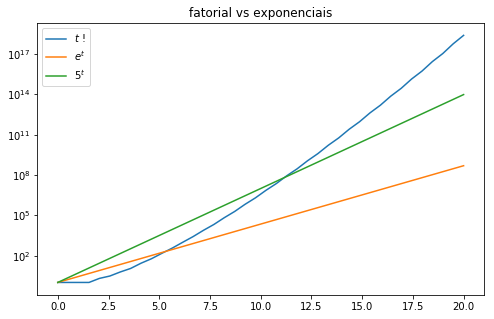

In [6]:
t = linspace(0,20,40)

figure(figsize=(8,5))
yscale('log')
title('fatorial vs exponenciais')
plot(t,fatorial_continua(t),label='$t$ !')
plot(t,exp(t),label='$e^t$')
plot(t,power(5,t),label='$5^t$')
legend();

### 1.1.2 Convergência da Série Geométricca

Outras séries podem só convergir em condições específicas. A Série Geométrica depende de $\lvert x \rvert < 1, \: x \in \mathbb{C}$.

Não tenho certeza quanto a necessidade, mas consigo mostrar que é suficiente para matrizes dizer que $\lVert A \rVert$ < 1, para alguma norma em que $\lVert AB \rVert \leq \lVert A \rVert \cdot \lVert B \rVert$

In [44]:
# defino matriz simétrica com norma < 1 (uso a norma de Frobenius por conveniência)
A = rand(2,2)
A[0,1] = A[1,0]
while norm(A,'fro') >= 1:
    A = rand(2,2)
    A[0,1] = A[1,0]
A

array([[ 0.25934332,  0.27998919],
       [ 0.27998919,  0.56401334]])

In [51]:
# defino uma matriz diagonal também com norma < 1
d = rand(2)
while norm(d) >= 1:
    d = rand(2)
D = diag(d)
D

array([[ 0.97198084,  0.        ],
       [ 0.        ,  0.17017378]])

In [75]:
n,_ = shape(A)
Id = eye(n)

In [ ]:
# Plotar convergência das somas parciais
# Plotar termo indo para zero

## 1.2. Outras Equivalências

Se estamos definindo essas funções dessa forma, é razoável exigir que relações que valem para números valham para matrizes, ou seja:

$
\sin^2(A) + \cos^2(A) = I \\
\displaystyle e^{\log(I+A)} = I+A \\
\displaystyle \sum_{n \geq 0} A^n = (I - A)^{-1}
$

In [73]:
all(serie_sin(A)**2 + serie_cos(A)**2 - Id <= 1e-1)

True

In [74]:
all(serie_geometrica(A,100) - inv(Id - A) <= 1e-9)

True

In [ ]:
# Plotar curva dos autovalores da matriz do problema